# Word Vectors

This is a small demo notebook to give you a feel for what word vector are and why they are useful. First, we will visualize the word vectors that you trained using the architectures you built. Then we will look at the GLoVe embeddings to see what the state-of-the-art has to offer.

---------------

## Your Trained Embeddings

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from utils import load_data

### Loading Vocabulary

In [12]:
vocab, _, _ = load_data(preprocess=False)
print("Total Vocabulary length:", len(vocab))
print()
print(vocab)

Total Vocabulary length: 250

['!', "'", "''", "'d", "'ll", "'m", "'re", "'s", "'ve", ',', '.', '...', '?', '``', 'a', 'about', 'actually', 'again', 'ah', 'all', 'am', 'an', 'and', 'any', 'anything', 'are', 'as', 'at', 'baby', 'back', 'bad', 'be', 'because', 'been', 'before', 'believe', 'best', 'better', 'big', 'but', 'by', 'ca', 'call', 'can', 'chandler', 'come', 'could', 'd', 'day', 'did', 'didn', 'do', 'does', 'doing', 'don', 'down', 'even', 'ever', 'everything', 'feel', 'fine', 'first', 'for', 'friend', 'from', 'fun', 'get', 'getting', 'girl', 'give', 'go', 'god', 'going', 'gon', 'good', 'got', 'great', 'guess', 'guy', 'guys', 'had', 'happened', 'has', 'have', 'having', 'he', 'help', 'her', 'here', 'hey', 'hi', 'him', 'his', 'honey', 'how', 'huh', 'i', 'i-i', 'if', 'in', 'into', 'is', 'it', 'joey', 'just', 'kinda', 'know', 'last', 'let', 'like', 'listen', 'little', 'll', 'look', 'lot', 'love', 'm', 'made', 'make', 'man', 'married', 'maybe', 'me', 'mean', 'minute', 'monica', 'more',

### t-distributed Stochastic Neighbor Embedding (TSNE) Plot

This is a very popular dimension reduction technique in order to visualize high-dimensional embeddings. It uses PCA along with other methods in order to preserve relative distance between the actual word vectors and its 2D projection.

**Note**: This projection is not deterministic. If you run it multiple times you will get different results. Sometimes you need to run it a few times in order to get a good projection.

In [13]:
def plot_tsne(word_vectors, vocab, n=None):
    
    # pick a random sample of all word vectors if there are too many
    index = np.arange(len(vocab))
    if not n is None:
        
        if n > len(vocab):
            raise ValueError(f"'n' ({n}) > the length of the vocabulary ({len(vocab)})")
        
        index = np.random.choice(index, size=n, replace=False)
        word_vectors = word_vectors[index, :]
    
    # compute tsne
    tsne = TSNE(n_components=2).fit_transform(word_vectors)
    x = tsne[:,0]
    y = tsne[:,1]

    # plot
    fig, ax = plt.subplots(figsize=(15,15), facecolor='white')
    plt.scatter(x, y, s=50, c='c')
    for i, idx in enumerate(index):
        word = vocab[idx]
        ax.annotate(word, (x[i], y[i]), fontsize=12)

### Continuous Bag of Words Model

In [14]:
cbow_word_vectors = np.loadtxt("cbow_word_vectors.csv")
print("embedding size =", cbow_word_vectors.shape[1])

embedding size = 100


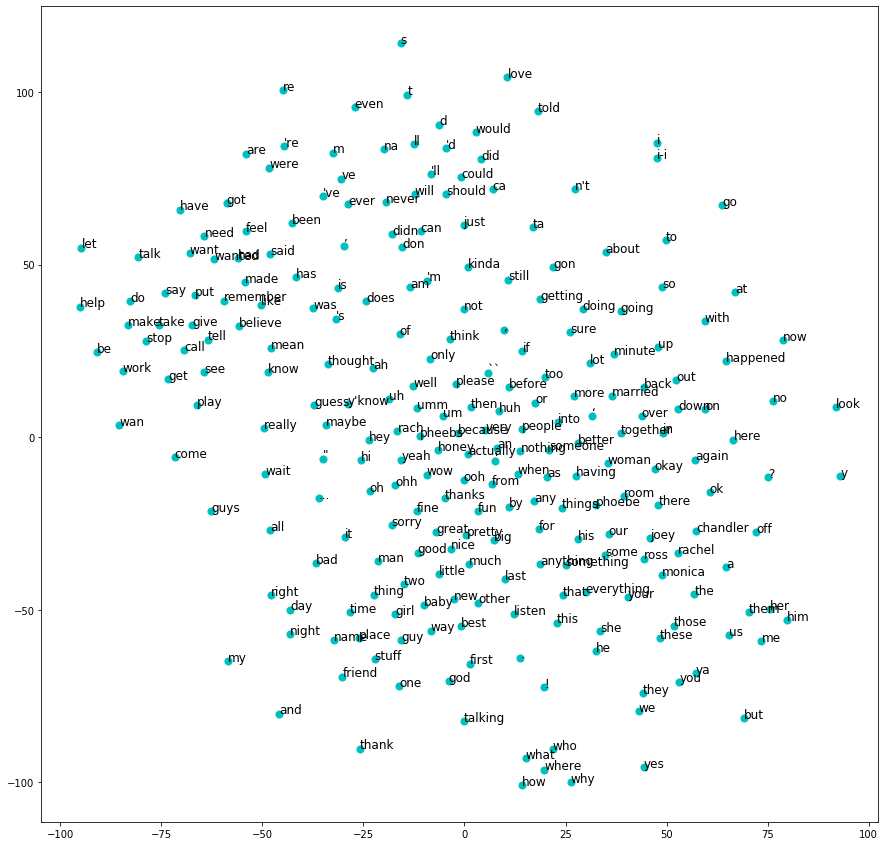

In [15]:
plot_tsne(cbow_word_vectors, vocab)

### Bengio's Model

In [16]:
bengio_word_vectors = np.loadtxt("bengio_word_vectors.csv")

embedding size = 100


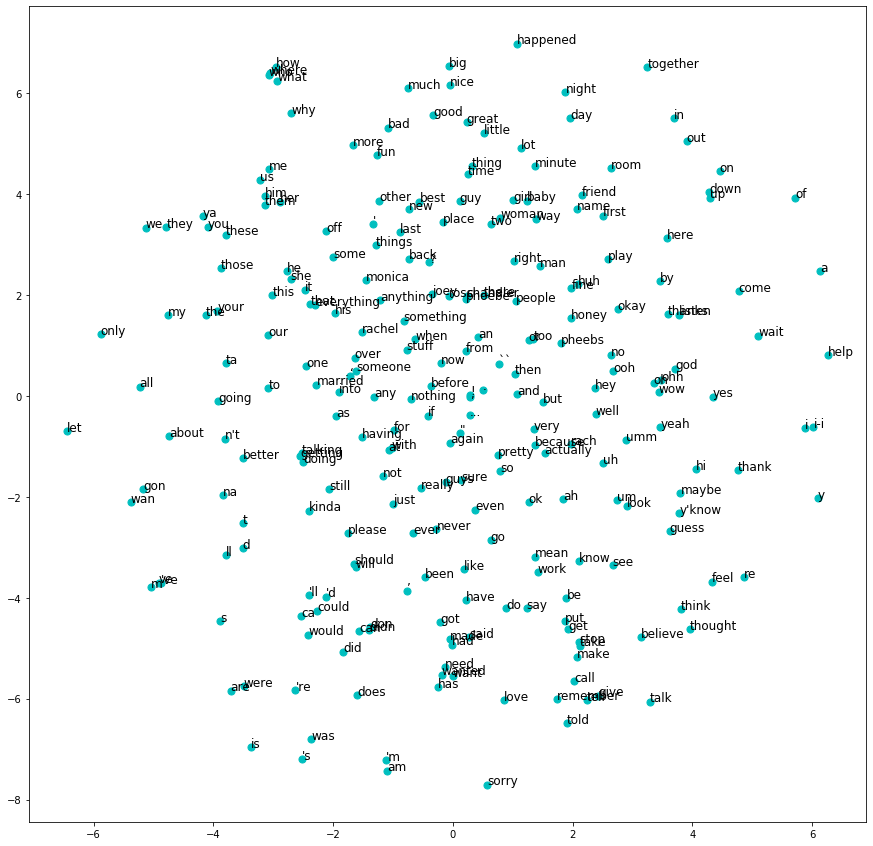

In [17]:
plot_tsne(bengio_word_vectors, vocab)
print("embedding size =", bengio_word_vectors.shape[1])

### Analysis

What do you notice about words that are close together?

-----------

## GloVe Embeddings

GloVe stands for **Global Vectors** and is currently the most popular word vector model. It uses a slightly different idea and method in order to obtain word vectors. Mainly, it is trying to account for the **co-occurence** between words. This is a global view rather than a local view of the relationship between words. This information is stored in the **co-oocurence matrix** denoted $\boldsymbol{X}$. Each entry corresponds to the number of times each word appears nearby (say less than 5 positions apart). It uses the following cost function to train

$$
\mathcal{J}(\boldsymbol{R}) = \sum_{i, j} f(x_{ij}) \left( \boldsymbol{r}^T_i \ \boldsymbol{\tilde{r}}_j + \boldsymbol{b}_i + \boldsymbol{\tilde{b}}_j - \log{x_{ij}} \right)^2
$$

$$
f(x_{ij}) = \begin{cases}
                \left( \frac{x_{ij}}{100} \right)^{\frac{3}{4}} \qquad &\text{if} \quad x_{ij} < 100 \\
                1 \qquad &\text{if} \quad x_{ij} \geq 100
            \end{cases}
$$

In [18]:
import torch
# pip install torchtext
import torchtext

# The first time you run this will download a ~823MB file
glove = torchtext.vocab.GloVe(name="6B", # trained on Wikipedia 2014 corpus
                              dim=50)   # embedding size = 50

### Comparision to Your Trained Embeddings

In [19]:
def glove_tsne_from_word_list(vocab):
    word_vectors = []
    for token in vocab:
        try:
            word_vectors.append(list(glove[token]))
        except:
            # the GloVe embeddings might not contain some of the tokens
            # since they were specific to the TV show Friends
            pass
    
    word_vectors = torch.tensor(word_vectors)
    plot_tsne(word_vectors, vocab)

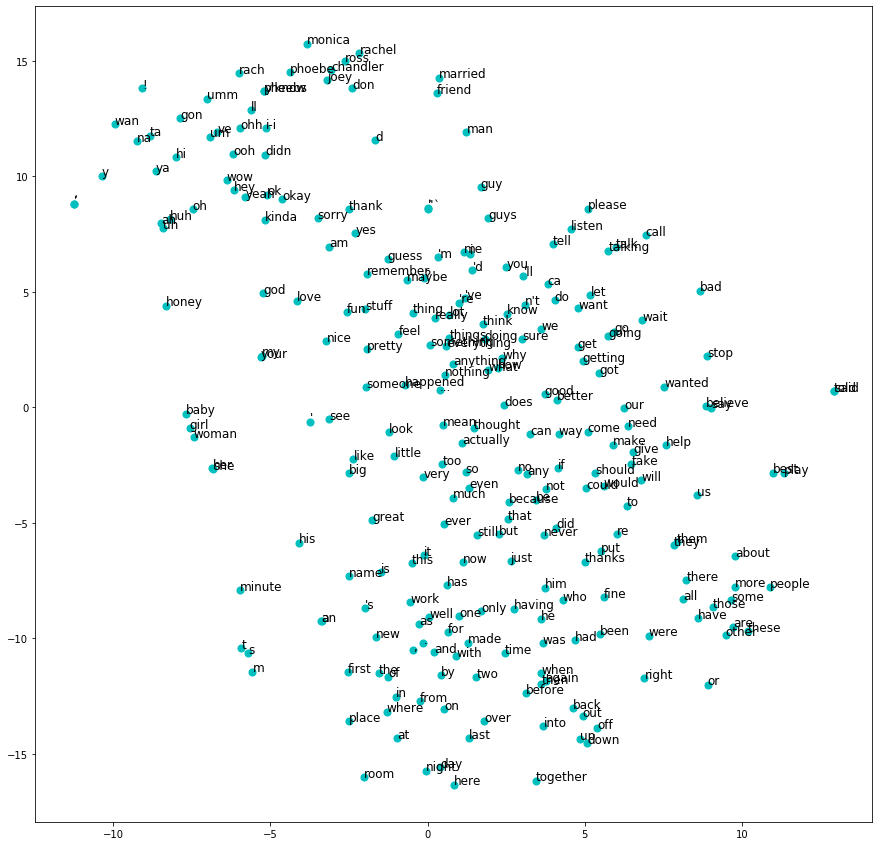

In [20]:
glove_tsne_from_word_list(vocab)

What do you notice about the words that are close together? Is this the same pattern from your embeddings?

### Deeper Dive into Word Vectors

Now that we have visualized word vectors on a high level, let's look at them in more detail. What actually is a word vector?

In [21]:
glove['apple']

tensor([ 0.5204, -0.8314,  0.4996,  1.2893,  0.1151,  0.0575, -1.3753, -0.9731,
         0.1835,  0.4767, -0.1511,  0.3553,  0.2591, -0.7786,  0.5218,  0.4769,
        -1.4251,  0.8580,  0.5982, -1.0903,  0.3357, -0.6089,  0.4174,  0.2157,
        -0.0742, -0.5822, -0.4502,  0.1725,  0.1645, -0.3841,  2.3283, -0.6668,
        -0.5818,  0.7439,  0.0950, -0.4787, -0.8459,  0.3870,  0.2369, -1.5523,
         0.6480, -0.1652, -1.4719, -0.1622,  0.7986,  0.9739,  0.4003, -0.2191,
        -0.3094,  0.2658])

As you can see, it's just a vector of numbers. On it's own these numbers don't really mean anything, but when combined with other word vectors they encode both syntatic and sematical information about the word.

More specifically, we have the **Distributional Hypothesis**: words with similar distributions have similar meanings, i.e. the closer together two word vectors are, the more similar their meaning.

There are a few ways we can define distance. The first is **Euclidean Distance** and the second is the **Cosine Distance**. What is the difference between the two and which is a better measure of distance between word vectors?

In [27]:
def Euclidean_distance(x, y, dim=0):
    return torch.norm(x - y, dim=dim)

def Cosine_similarity(x, y, dim=0):
    #return torch.nn.CosineSimilarity(dim=dim)(x, y)
    return (x  y) / (torch.norm(x, dim=dim) * torch.norm(y, dim=dim))

def Cosine_distance(x, y, dim=0):
    return 1 - Cosine_similarity(x, y, dim=dim)

$$
\texttt{Euclidean-distance}(\boldsymbol{x}, \boldsymbol{y}) = \Vert \boldsymbol{x} - \boldsymbol{y} \ \Vert_2
$$

$$
\texttt{Cosine-similarity}(\boldsymbol{x}, \boldsymbol{y}) = \frac{ \boldsymbol{x} \cdot \boldsymbol{y}}{\Vert \boldsymbol{x} \ \Vert_2 \ \Vert \boldsymbol{y} \ \Vert_2} = 
$$

$$
\texttt{Cosine-distance}(\boldsymbol{x}, \boldsymbol{y}) = 1 - \texttt{Cosine-similarity}(\boldsymbol{x}, \boldsymbol{y}) = \texttt{Euclidean-distance} \left( \frac{\boldsymbol{x}}{\Vert \boldsymbol{x} \ \Vert_2}, \frac{\boldsymbol{y}}{\Vert \boldsymbol{y} \ \Vert_2} \right)
$$

In [30]:
def get_closest_words(vec, n=5, distance=Euclidean_distance):
    dists = distance(glove.vectors, vec.unsqueeze(0), dim=1)
    dists = sorted(enumerate(dists.numpy()), key=lambda x: x[1])
    
    top = dists[1:n+1]
    for i, (idx, difference) in enumerate(top):
        print(f"{i+1}) {glove.itos[idx]:15s} {difference:5.2f}")
    
    #return dists[1:n+1]

We can play around with word vectors and test the distributional hypothesis.

In [31]:
get_closest_words(glove['nurse'])

1) doctor           3.13
2) dentist          3.13
3) nurses           3.27
4) pediatrician     3.32
5) counselor        3.40


In [32]:
get_closest_words(glove['anxiety'])

1) persistent       3.23
2) experiencing     3.25
3) discomfort       3.29
4) nervousness      3.29
5) anxieties        3.30


So far so good. Now we can spice things up a bit by doing vector operations.

In [34]:
get_closest_words(glove['king'] - glove['man'] + glove['woman'])

1) queen            2.84
2) prince           3.66
3) elizabeth        3.72
4) daughter         3.83
5) widow            3.85


In [35]:
get_closest_words(glove['queen'] - glove['woman'] + glove['man'])

1) king             2.84
2) prince           3.25
3) crown            3.45
4) knight           3.56
5) coronation       3.62


It's pretty wild that this just works out. Now, we can also show that the word vector from the GloVe embeddings are somewhat biased. This is due to the fact that the corpus's it was trained on were biased due to social norms.

In [54]:
get_closest_words(glove['doctor'] - glove['man'] + glove['woman'])

1) doctor           0.09
2) nurse            0.11
3) woman            0.12
4) mother           0.12
5) child            0.12


In [55]:
get_closest_words(glove['doctor'] - glove['woman'] + glove['man'])

1) doctor           0.10
2) him              0.14
3) he               0.14
4) man              0.14
5) his              0.15


In [56]:
get_closest_words(glove['programmer'] - glove['man'] + glove['woman'])

1) programmer       0.14
2) therapist        0.18
3) educator         0.18
4) u.s.-venezuelan  0.19
5) mandopop         0.19


In [57]:
get_closest_words(glove['programmer'] - glove['woman'] + glove['man'])

1) programmer       0.13
2) software         0.16
3) computer         0.17
4) gerst            0.17
5) programmers      0.17


This seem quite weird. How is it that our word vectors allow "king" - "man" + "woman" = "queen"? This phenomenon is called **word analogies** and it occurs because of the distributive hypothesis. Take the relationship between capitals and cities for example. It turns out that the mapping between capitcals and cities roughly correspond to a single direction in the high dimension embedding space that the word vectors live in.

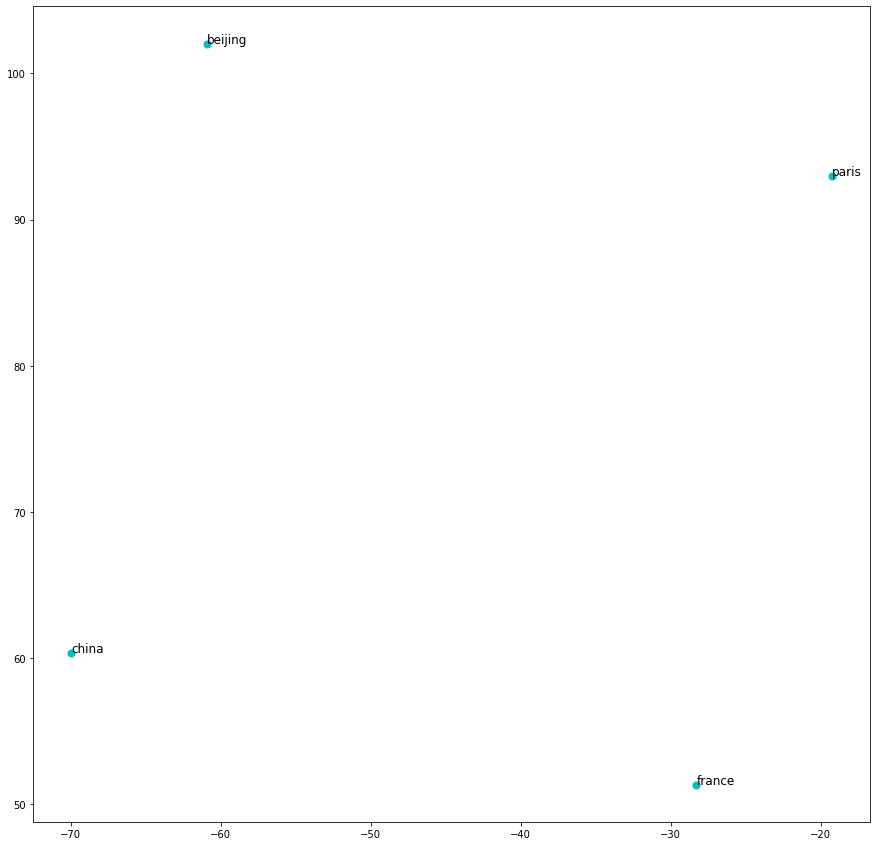

In [40]:
countries = ["china", "france"]
capitals = ["beijing", "paris"]

glove_tsne_from_word_list(countries + capitals)

As you can see, if you drew a line between "paris" and "france" and "china" and "beijing", they would be parallel. 